In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
#import datetime

In [126]:
data = pd.read_csv('bitcoin2015~2020.csv')
data.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,01-Jan-15,320,320,314,314,8036550,4.297536e+09
1,02-Jan-15,314,316,314,315,7860650,4.309551e+09
2,03-Jan-15,315,315,281,281,33054400,3.846270e+09
3,04-Jan-15,281,287,258,264,55629100,3.616321e+09
4,05-Jan-15,265,278,265,274,43962800,3.758098e+09


In [127]:
high_prices = data['High'].values

In [128]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(high_prices) - sequence_length):
    result.append(high_prices[index: index + sequence_length])

In [129]:
# z-score 정규화
normalized_data = []
z_mean = []
z_std = []

for z in result:
    normalized_z = [((p - np.mean(z)) / np.std(z)) for p in z]
    normalized_data.append(normalized_z)
    z_mean.append(np.mean(z))
    z_std.append(np.std(z))

result = np.array(normalized_data)

# split learning and test data
row = int(round(result.shape[0] * 0.9))
learning = result[:row, :]
np.random.shuffle(learning)

x_learning = learning[:, :-1]
x_learning = np.reshape(x_learning, (x_learning.shape[0], x_learning.shape[1], 1))
y_learning = learning[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_learning.shape, x_test.shape

((1748, 50, 1), (194, 50, 1))

In [130]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))
model.add(LSTM(80, return_sequences=False))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_8 (LSTM)                (None, 80)                41920     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 81        
Total params: 52,401
Trainable params: 52,401
Non-trainable params: 0
_________________________________________________________________


In [131]:
model.fit(x_learning, y_learning,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

Train on 1748 samples, validate on 194 samples
Epoch 1/20
1748/1748 [==============================] - 11s 6ms/step - loss: 0.4906 - val_loss: 0.2597
Epoch 2/20
1748/1748 [==============================] - 10s 6ms/step - loss: 0.2139 - val_loss: 0.1567
Epoch 3/20
1748/1748 [==============================] - 12s 7ms/step - loss: 0.1758 - val_loss: 0.1383
Epoch 4/20
1748/1748 [==============================] - 11s 6ms/step - loss: 0.1631 - val_loss: 0.1787
Epoch 5/20
1748/1748 [==============================] - 10s 6ms/step - loss: 0.1610 - val_loss: 0.1544
Epoch 6/20
1748/1748 [==============================] - 10s 6ms/step - loss: 0.1580 - val_loss: 0.1403
Epoch 7/20
1748/1748 [==============================] - 10s 6ms/step - loss: 0.1566 - val_loss: 0.1432
Epoch 8/20
1748/1748 [==============================] - 11s 6ms/step - loss: 0.1497 - val_loss: 0.1698
Epoch 9/20
1748/1748 [==============================] - 10s 6ms/step - loss: 0.1492 - val_loss: 0.1663
Epoch 10/20
1748/1748 [===

In [104]:
pred = model.predict(x_test)

In [105]:
# 복원
pred_result = []
pred_y = []
for i in range(len(pred)):
    prediction = (pred[i] * z_std[i]) + z_mean[i]
    ture = (y_test[i] * z_std[i]) + z_mean[i]
    pred_result.append(prediction)
    pred_y.append(ture)

C:\Users\HaseonTak\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


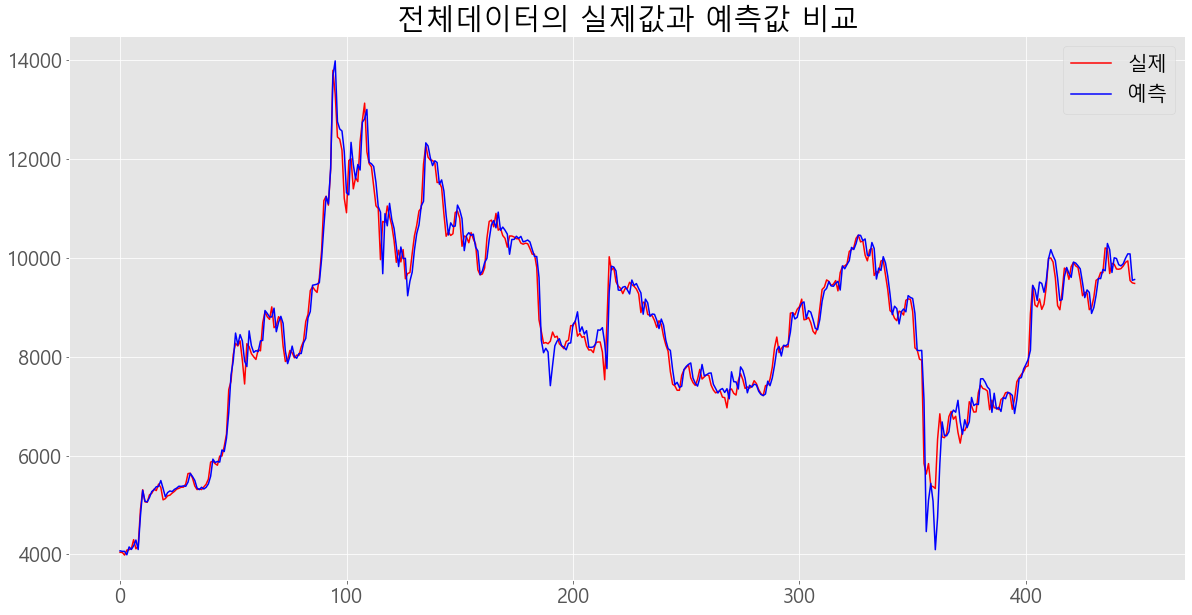

In [106]:
fig = plt.figure(facecolor='white', figsize=(20, 10))
plt.style.use("ggplot")
plt.rc('font',family='Malgun Gothic',size=20)
plt.title("전체데이터의 실제값과 예측값 비교")
ax = fig.add_subplot(111)
ax.plot(pred_y,"red" ,label='실제')
ax.plot(pred_result,"blue", label='예측')
ax.legend()
plt.show()

In [107]:
tomorrow_price =high_prices[-500:]
len(tomorrow_price)

500

In [108]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(tomorrow_price) - sequence_length):
    result.append(tomorrow_price[index: index + sequence_length])

In [109]:
# z-score 정규화
normalized_data = []
z_mean = []
z_std = []

for z in result:
    normalized_z = [((p - np.mean(z)) / np.std(z)) for p in z]
    normalized_data.append(normalized_z)
    z_mean.append(np.mean(z))
    z_std.append(np.std(z))

result = np.array(normalized_data)

x_test = result[:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[:, -1]

x_test.shape

(449, 50, 1)

In [110]:
pred = model.predict(x_test)

In [111]:
# 복원
pred_result = []
pred_y = []
for i in range(len(pred)):
    prediction = (pred[i] * z_std[i]) + z_mean[i]
    ture = (y_test[i] * z_std[i]) + z_mean[i]
    pred_result.append(prediction)
    pred_y.append(ture)

In [112]:
real_data = pd.read_csv('bitcoin7days.csv')
real_result = real_data['High'].values
date = real_data['Date'].values
pred_result=pred_result[-7:]
real_result
date

array(['2020/06/11', '2020/06/12', '2020/06/13', '2020/06/14',
       '2020/06/15', '2020/06/16', '2020/06/17'], dtype=object)

C:\Users\HaseonTak\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


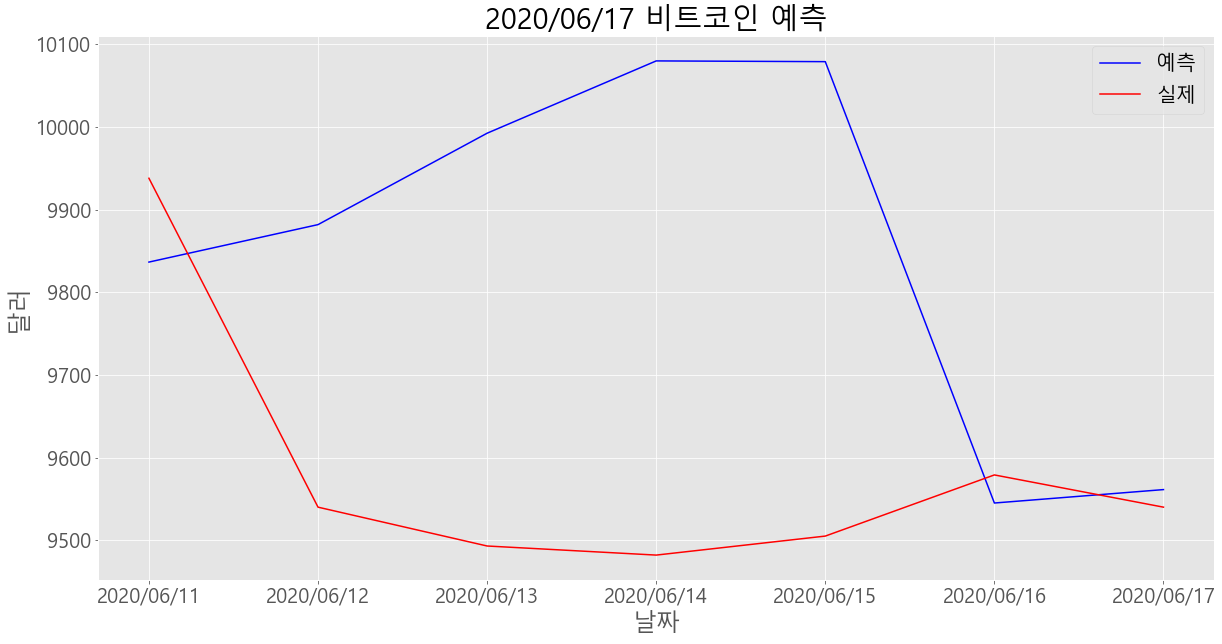

In [113]:
fig = plt.figure(facecolor='white', figsize=(20, 10))
plt.style.use("ggplot")
plt.rc('font',family='Malgun Gothic',size=20)
plt.ylabel("달러")
plt.xlabel("날짜")
plt.title("2020/06/17 비트코인 예측")
ax = fig.add_subplot(111)
ax.plot(pred_result,"blue", label='예측')
ax.plot(date,real_result,"red", label='실제')
ax.legend()
plt.show()

In [114]:
print('2020년 6월 17일의 예측주가는', '%0.2f'%float(pred_result[-1]))
print('2020년 6월 17일의 실제주가는', '%0.2f'%float(real_result[-1]))

2020년 6월 17일의 예측주가는 9561.25
2020년 6월 17일의 실제주가는 9540.00
